In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import scipy.stats as stats
import pymysql
import getpass
from matplotlib import pyplot as plt
import numpy as np

from sqlalchemy import create_engine
from scipy.special import inv_boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import openpyxl
from pathlib import Path

warnings.filterwarnings('ignore')

In [2]:
#reading dataset

In [3]:
df = pd.read_excel(io='regression_data.xls')

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
# review the list of all columns in the dataset
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [6]:
#colums are already standardized

In [7]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [8]:
#some visualization of the data

In [9]:
df.value_counts().count()


21597

In [10]:
df.isnull().values.sum()


0

In [11]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [12]:
# first observation: lat and long should be removed we have zip code

In [13]:
df.isna().any()


id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [14]:
#no nulls apparently

## Checking Distribution of numerical columns

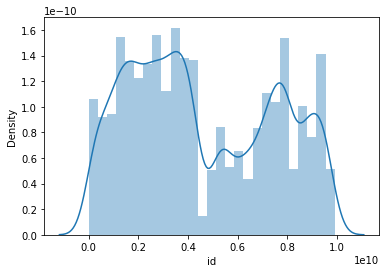

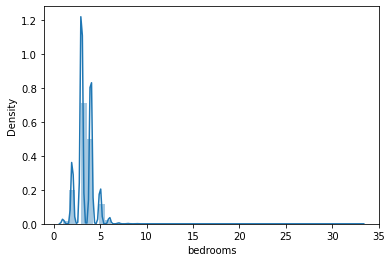

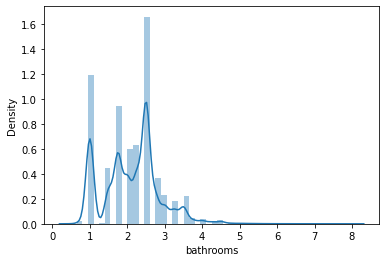

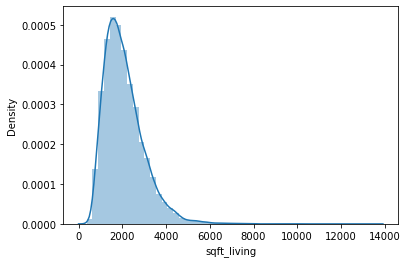

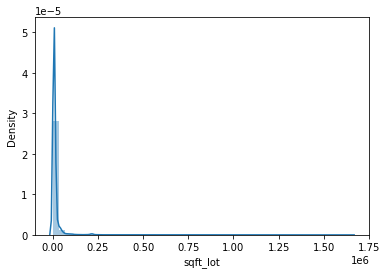

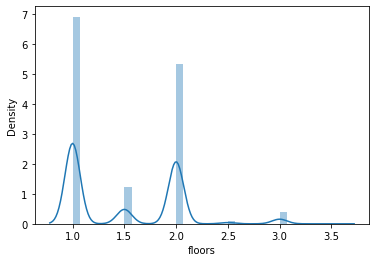

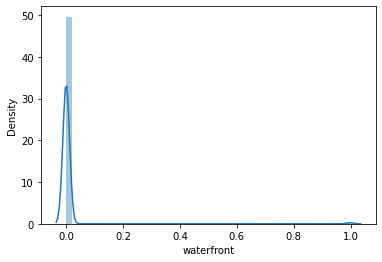

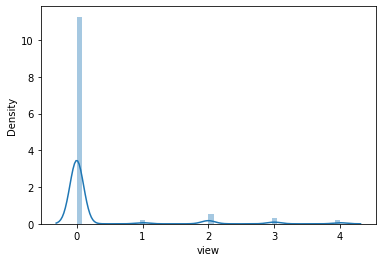

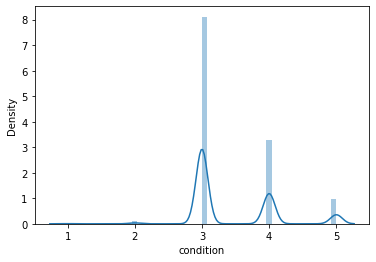

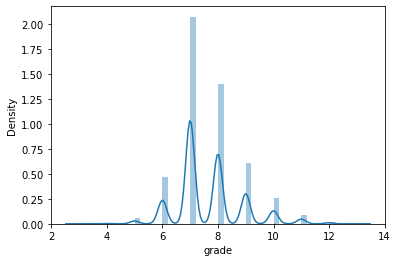

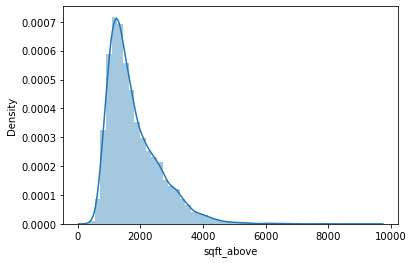

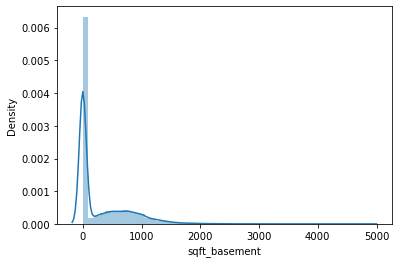

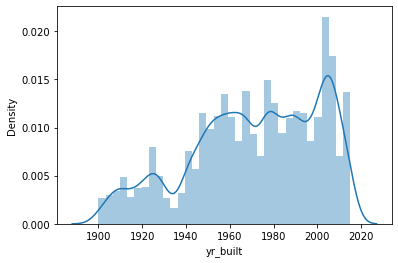

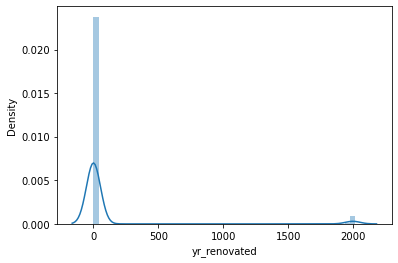

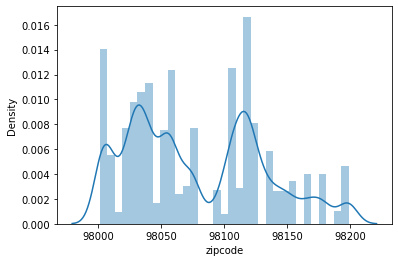

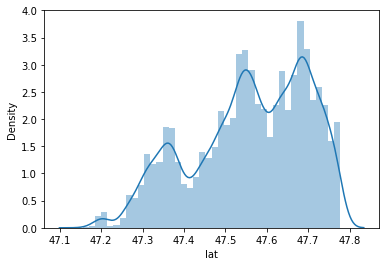

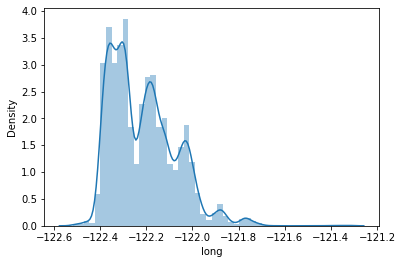

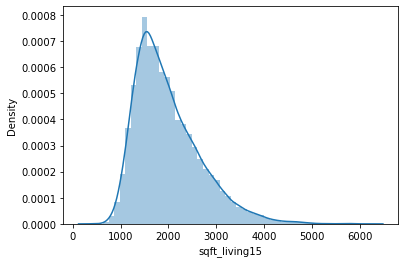

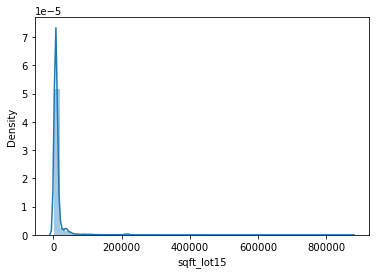

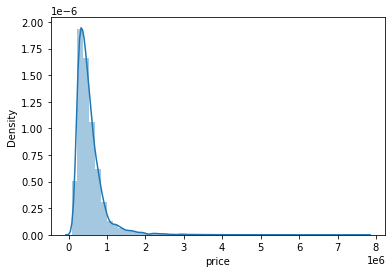

In [15]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

In [16]:
#lots of outliers 

In [17]:
#checking if id can be used as index

In [18]:
df['id'].value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [19]:
#we can see here id's are not unique, cannot set as index, probably this is due to the fact that a house was listed several times

In [20]:
df[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


In [21]:
df[df['id'] == 7409700215]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
3295,7409700215,2014-06-06,3,1.5,1900,5000,1.5,0,0,3,...,1640,260,1926,0,98115,47.6779,-122.294,2090,5000,550000
3296,7409700215,2015-03-13,3,1.5,1900,5000,1.5,0,0,3,...,1640,260,1926,0,98115,47.6779,-122.294,2090,5000,921500


In [22]:
#duplicated id have the same information except mainly for the price, date  so we can conclude that the id is related with the house and if one house was sold twice it appears in different rows with different prices and dates.


In [23]:
df.dtypes


id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [24]:
#changing zip code to strings as we cannot compute operations with them

In [25]:
df = df.astype({"zipcode": str})


In [26]:
#dropping id

In [27]:
df.drop("id", axis=1, inplace=True)

In [28]:
df.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [29]:
#also i believe latitude and longitude are no longer needed as we have zipcode

In [30]:
df.drop(["lat", "long"], axis = 1, inplace = True)


In [31]:
df.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

## Converting date too to see if year and or month could be used

In [32]:
df['date'].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64

In [33]:
df['date_year'] = df['date'].dt.year
df['date_month'] = df['date'].dt.month
df['date_day'] = df['date'].dt.day

In [34]:
df[['date_year','date_month','date_day']]

,date_year,date_month,date_day
0,2014,10,13
1,2014,12,9
2,2015,2,25
3,2014,12,9
4,2015,2,18
...,...,...,...
21592,2014,5,21
21593,2015,2,23
21594,2014,6,23
21595,2015,1,16


In [35]:
df.drop("date", axis=1, inplace=True)

In [36]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,date_year,date_month,date_day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18


In [37]:
df.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
sqft_living15      int64
sqft_lot15         int64
price              int64
date_year          int64
date_month         int64
date_day           int64
dtype: object

In [38]:
##checking year renovated 

In [39]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [40]:
#data is not telling us much as mots of the records are not renovated

In [41]:
df.drop("yr_renovated", axis=1, inplace=True)

In [42]:
## will encode categoricals and try first models with "raw" data (without normalizing)


In [43]:
numericals = df.select_dtypes(np.number)


In [44]:
numericals.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,date_year,date_month,date_day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,221900,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639,538000,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062,180000,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000,604000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,510000,2015,2,18


In [45]:
categorical = df.select_dtypes(object)


In [46]:
categorical.head()

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074


In [47]:
cat_encoded = pd.get_dummies(categorical, drop_first=True)
cat_encoded.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df=pd.concat([cat_encoded,numericals], axis=1)

In [49]:
df.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,date_year,date_month,date_day
0,0,0,0,0,0,0,0,0,0,0,...,7,1180,0,1955,1340,5650,221900,2014,10,13
1,0,0,0,0,0,0,0,0,0,0,...,7,2170,400,1951,1690,7639,538000,2014,12,9
2,0,0,0,0,0,0,0,0,0,0,...,6,770,0,1933,2720,8062,180000,2015,2,25
3,0,0,0,0,0,0,0,0,0,0,...,7,1050,910,1965,1360,5000,604000,2014,12,9
4,0,0,0,0,0,0,0,0,0,0,...,8,1680,0,1987,1800,7503,510000,2015,2,18


In [50]:
#defining X and Y

In [51]:
X=df.drop('price', axis=1)
y=df.price

In [52]:
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (21597, 86)
Y shape: (21597,)


# #Linear Regression try 1

In [53]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30, random_state = 100) 

In [54]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
lm = LinearRegression()

In [56]:
lm = model.score(X_test,y_test)
lm

0.7871345606701949

In [57]:
predictions = model.predict(X_test)

In [58]:
r2_LINEAR=  r2_score(y_test, predictions)
RMSE_LINEAR = mean_squared_error(y_test,predictions, squared=False)
MSE_LINEAR =  mean_squared_error(y_test, predictions)
MAE_LINEAR = mean_absolute_error(y_test,predictions)

In [59]:
print ("R2 is:",r2_LINEAR)
print ("RMSE is:",RMSE_LINEAR)
print ("MSE is:",MSE_LINEAR)
print ("MAE is:",MAE_LINEAR)

R2 is: 0.7871345606701949
RMSE is: 176541.65293500485
MSE is: 31166955221.02371
MAE is: 97098.26980737023


In [60]:
predictions

array([ 637988.80725099,  373528.54471001,  193423.48662883, ...,
       1214497.38139437,  183233.41856433,  843820.05245966])

In [61]:
def diff_df(y_test, predictions):
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['diff'] =results['true']-results['pred']
    return results

In [62]:
results = diff_df(y_test, predictions)
results

,true,pred,diff
7189,900000,6.379888e+05,262011.192749
2751,346950,3.735285e+05,-26578.544710
17077,305000,1.934235e+05,111576.513371
15151,507000,5.008054e+05,6194.610719
985,283000,2.630842e+05,19915.799829
...,...,...,...
11524,550000,4.603803e+05,89619.670631
20461,355000,4.237739e+05,-68773.920292
4102,1040000,1.214497e+06,-174497.381394
3415,245000,1.832334e+05,61766.581436


<AxesSubplot:xlabel='true', ylabel='pred'>

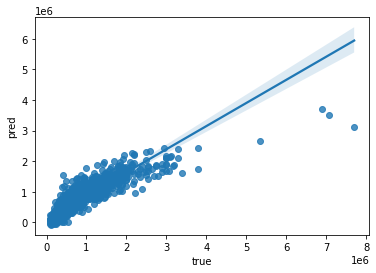

In [63]:
 sns.regplot(results['true'], results['pred'])


######RESULTS FOR LINEAR REGRESSION TRY ONE


# NOW TRYING MLP REGRESSOR

In [64]:
from sklearn.neural_network import MLPRegressor


In [65]:
model_mlp = MLPRegressor(random_state=42, max_iter=10000)


In [66]:
model_mlp.fit(X_train, y_train)


MLPRegressor(max_iter=10000, random_state=42)

In [67]:
predictions_mlp = model_mlp.predict(X_test)


In [68]:
r2_MLP=  r2_score(y_test, predictions_mlp)
RMSE_MLP = mean_squared_error(y_test,predictions_mlp, squared=False)
MSE_MLP =  mean_squared_error(y_test, predictions_mlp)
MAE_MLP = mean_absolute_error(y_test,predictions_mlp)

In [69]:
print ("R2 is:",r2_MLP)
print ("RMSE is:",RMSE_MLP)
print ("MSE is:",MSE_MLP)
print ("MAE is:",MAE_MLP)

R2 is: 0.5019978635969038
RMSE is: 270028.87914288056
MSE is: 72915595571.16039
MAE is: 172171.09171106038


In [70]:
MLP_results = diff_df(y_test, predictions_mlp)
MLP_results

,true,pred,diff
7189,900000,3.633953e+05,536604.664594
2751,346950,5.708406e+05,-223890.557147
17077,305000,1.933008e+05,111699.211390
15151,507000,5.399090e+05,-32908.960805
985,283000,5.794990e+05,-296498.994782
...,...,...,...
11524,550000,3.014979e+05,248502.114172
20461,355000,2.929998e+05,62000.182403
4102,1040000,1.077451e+06,-37450.705243
3415,245000,1.631090e+05,81890.991305


<AxesSubplot:xlabel='price'>

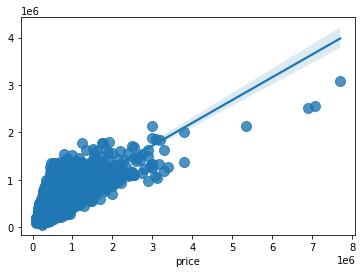

In [71]:
sns.regplot(y_test, predictions_mlp, fit_reg=True, scatter_kws={"s": 100})

###RESULTS OF MLP TRY ONE


# NOW KNEIGHBORS REGRESSOR

In [72]:
from sklearn.neighbors import KNeighborsRegressor


In [73]:
scores = []
for i in range(2,15): 
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))


Text(0, 0.5, 'R2')

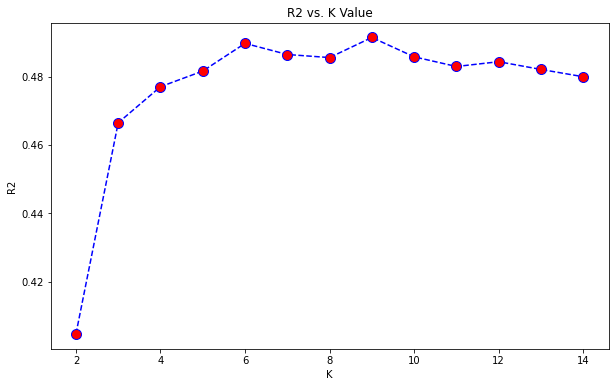

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, color = 'blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [75]:
model = KNeighborsRegressor(n_neighbors=9)

model.fit(X_train, y_train)

test_predictions = model.predict(X_test)

In [76]:
r2_KNR=  r2_score(y_test, test_predictions)
RMSE_KNR= mean_squared_error(y_test,test_predictions, squared=False)
MSE_KNR=  mean_squared_error(y_test, test_predictions)
MAE_KNR= mean_absolute_error(y_test,test_predictions)

In [77]:
print ("R2 is:",r2_KNR)
print ("RMSE is:",RMSE_KNR)
print ("MSE is:",MSE_KNR)
print ("MAE is:",MAE_KNR)

R2 is: 0.4914196086184569
RMSE is: 272881.70292254235
MSE is: 74464423789.90665
MAE is: 158132.68578532236


<AxesSubplot:xlabel='price'>

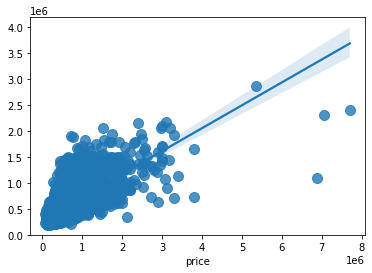

In [78]:
sns.regplot(y_test, test_predictions, fit_reg=True, scatter_kws={"s": 100})

### RESULTS OF KNR TRY ONE:


# SUMMARY

In [79]:
r2_LINEAR


0.7871345606701949

In [80]:
r2_MLP


0.5019978635969038

In [81]:
r2_KNR

0.4914196086184569

In [82]:
round1 = [r2_LINEAR, r2_MLP,r2_KNR]

In [83]:
round1

[0.7871345606701949, 0.5019978635969038, 0.4914196086184569]

In [84]:
### i will create a dictionary for rounds so we can compare visually which models are perfoming better

In [85]:
labels = ['LinearRegression','MLP','KNR']
models= labels
results = pd.DataFrame({'Models': models, 'Round1': round1})

In [86]:
##results of Round 1

No handles with labels found to put in legend.


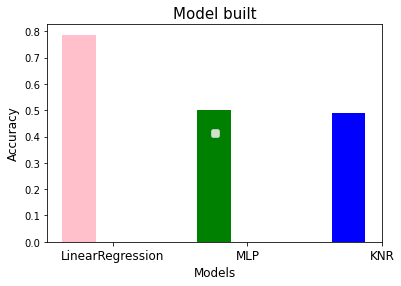

In [87]:
plt.figure()
wd = 0.5
x_pos = np.arange(1, 2*len(labels), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, results.Round1, color=['pink', 'green','blue'], width=wd,
        )

# Add xticks
plt.xticks(x_pos+wd, results.Models.values, fontsize=12)
plt.yticks(fontsize=10)
plt.title('Model built', fontsize=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.legend(loc='center', fontsize=10)
plt.show()


# Round 2 
Will now normalize and remove outliers

In [88]:
#first will visualize data that might include outliers

In [89]:
df.columns

Index(['zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', '

In [90]:
da_for_box= df[['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade']]

<AxesSubplot:>

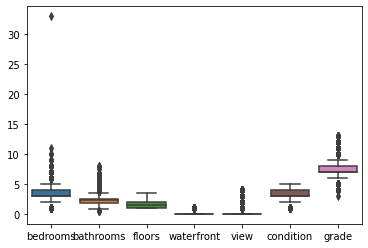

In [91]:
sns.boxplot(data=da_for_box)


In [92]:
#to chechk outliers in grade on more detail

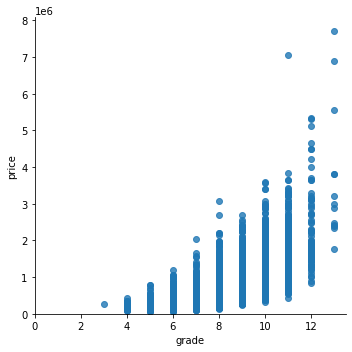

In [93]:
sns.lmplot(x='grade', y='price', data=df,
           fit_reg=False)
 
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()

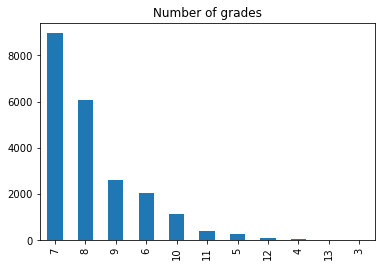

In [94]:
grades = df['grade'].value_counts().plot(kind='bar',
                                    title="Number of grades")

In [95]:
#will check whole correlation

In [96]:
numericals.corr()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,date_year,date_month,date_day
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.393406,0.030690,0.308787,-0.009949,-0.001046,-0.007711
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.569884,0.088303,0.525906,-0.026577,0.007543,-0.005169
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.756402,0.184342,0.701917,-0.029014,0.012112,-0.007413
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.144763,0.718204,0.089876,0.005628,-0.002591,0.000252
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.280102,-0.010722,0.256804,-0.022352,0.014245,-0.006492
waterfront,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.086507,0.030781,0.266398,-0.004168,0.008148,0.010530
view,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.280681,0.072904,0.397370,0.001268,-0.005398,0.011409
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.093072,-0.003126,0.036056,-0.045898,0.022388,-0.004630
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.713867,0.120981,0.667951,-0.030635,0.008989,-0.012588
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.731767,0.195077,0.605368,-0.023782,0.010153,-0.002684


<AxesSubplot:>

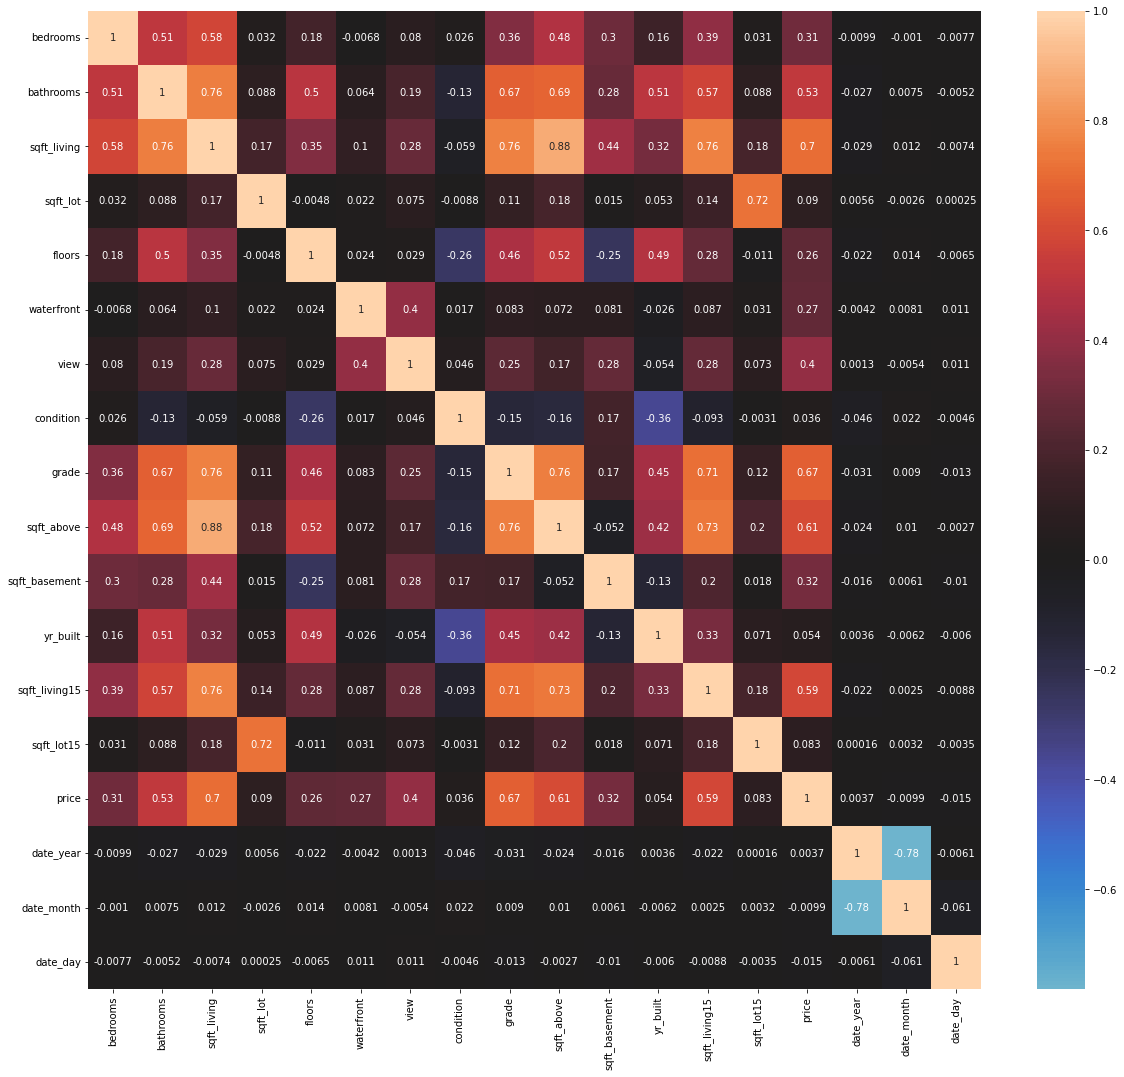

In [97]:
corr = numericals.corr()
 
# Heatmap
plt.figure(figsize=(20,18))
sns.heatmap(corr,
           center=0,
           annot=True)

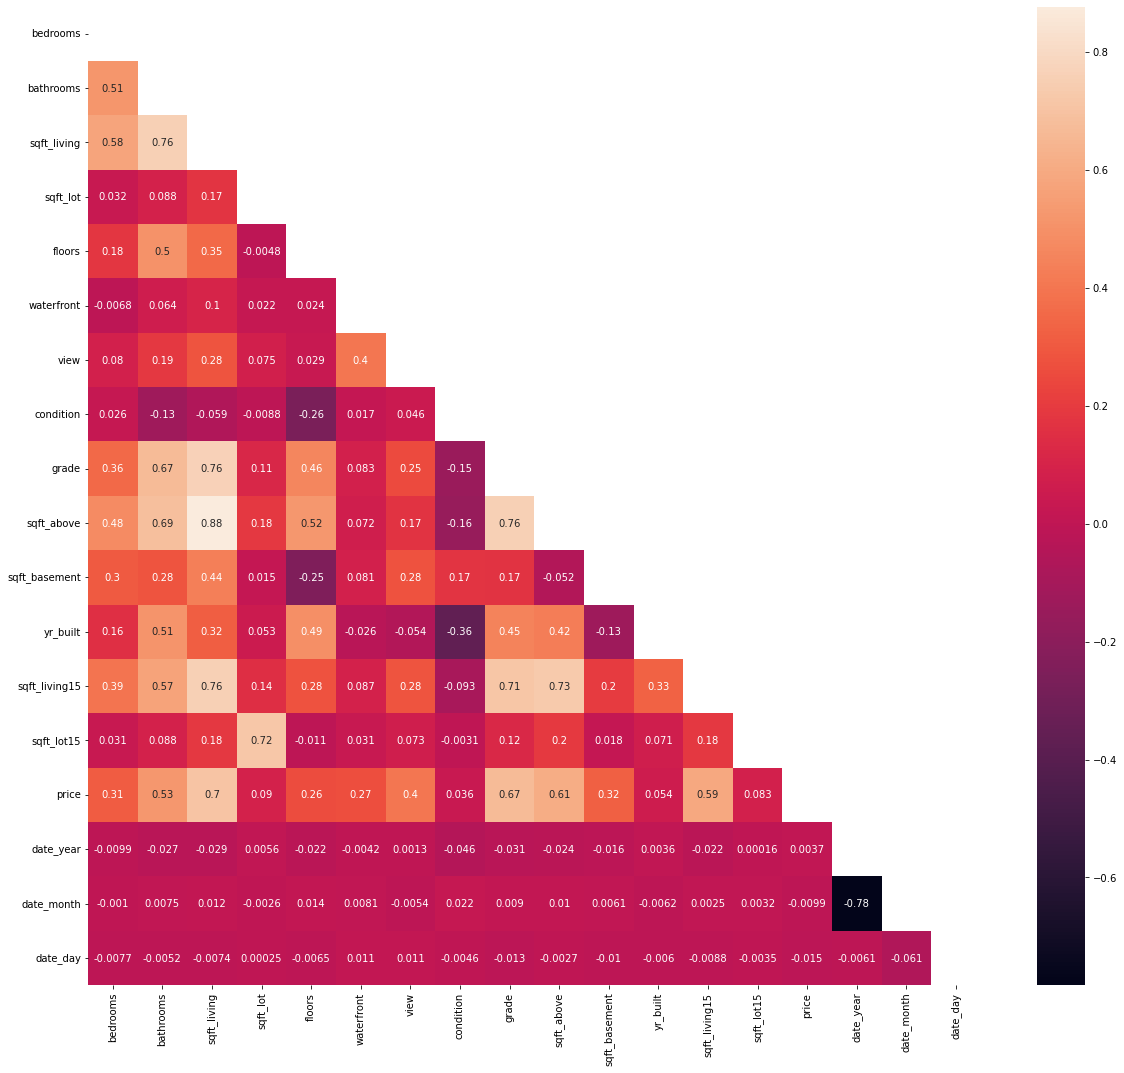

In [98]:
mask=np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)]=True

fig, ax=plt.subplots(figsize=(20, 18))
ax=sns.heatmap(numericals.corr(), mask=mask, annot=True,)
plt.show()

In [99]:
#we can see mostly features regarding the size of the property impact more the price of the house (sqfliving) as well as grade


In [100]:
###working on outliers

# WILL CREATE A NEW DATAFRAME FOR SECOND MODELING

In [101]:
##dropping columns with low correlation to price

In [102]:
df2 = df.drop(['date_day','date_month','date_year','condition','yr_built','view','waterfront','sqft_basement'], axis=1, inplace=False)

In [103]:
##lower than 0.50 correlation that i want to change for later

In [104]:
#'bedrooms','floors', 'sqft_basement' 'sqft_lot'

In [105]:
#will check them separately 

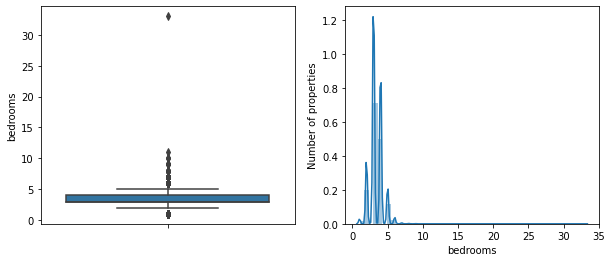

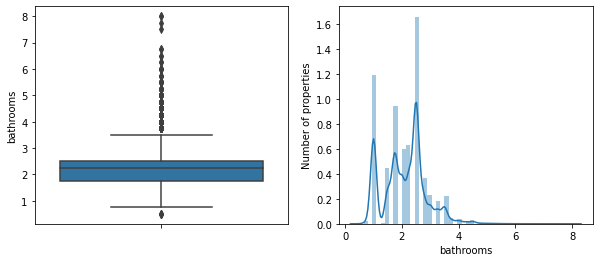

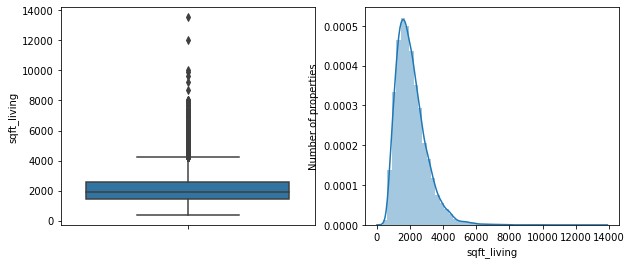

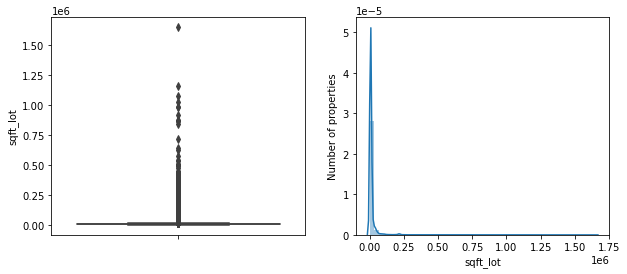

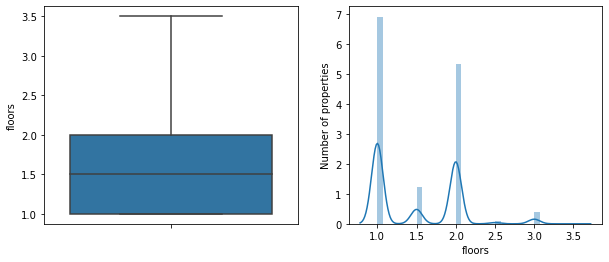

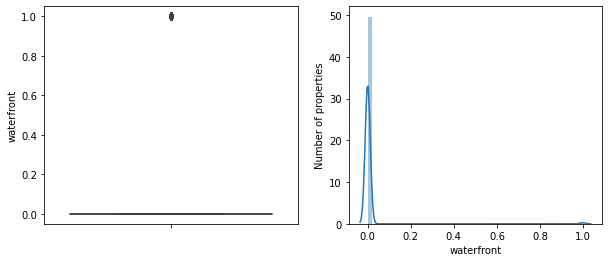

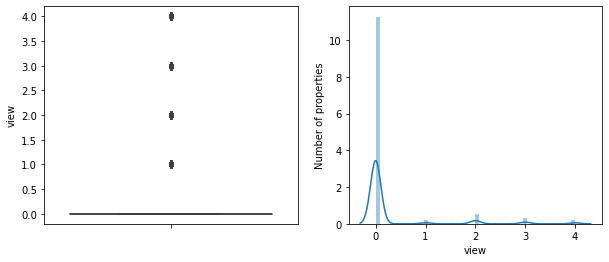

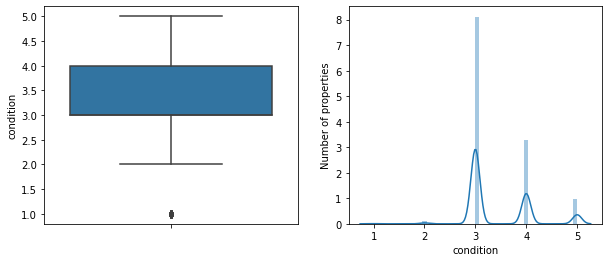

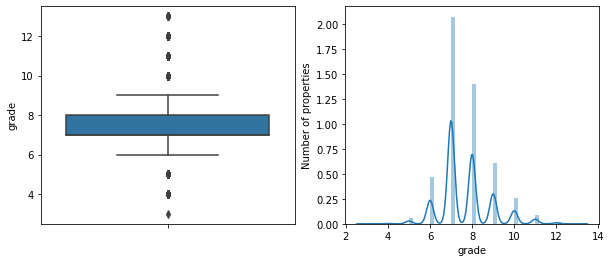

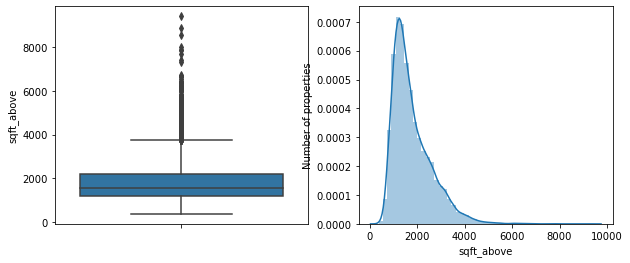

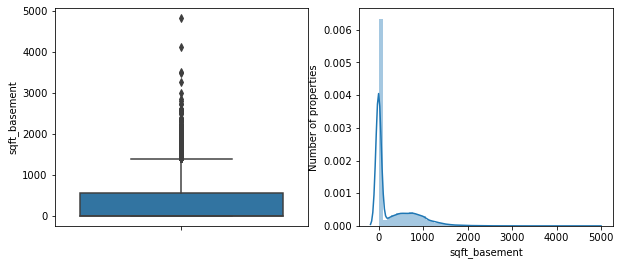

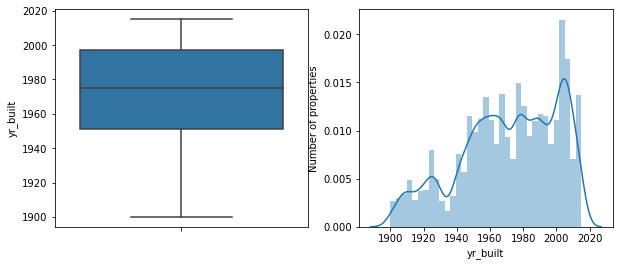

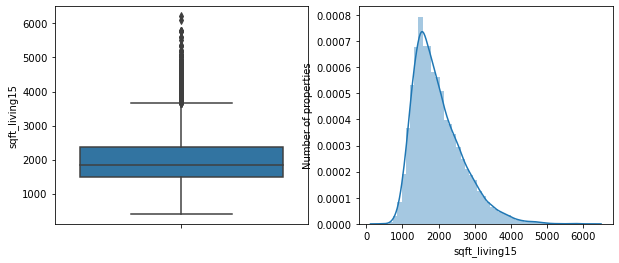

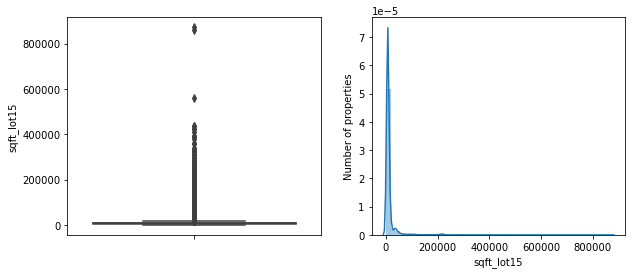

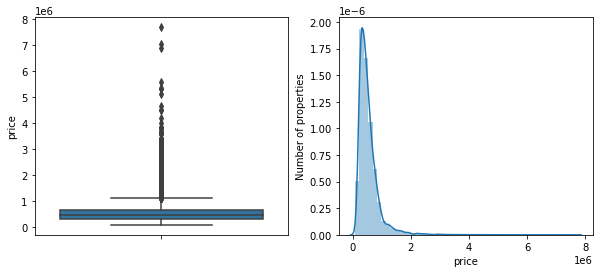

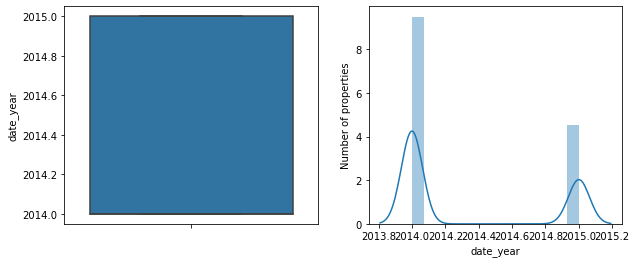

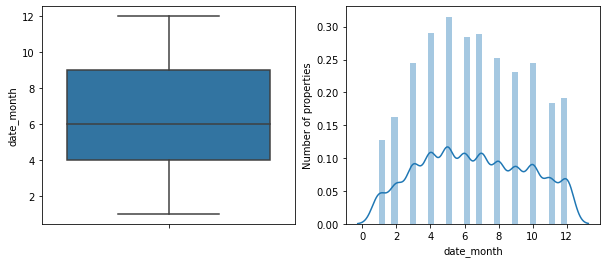

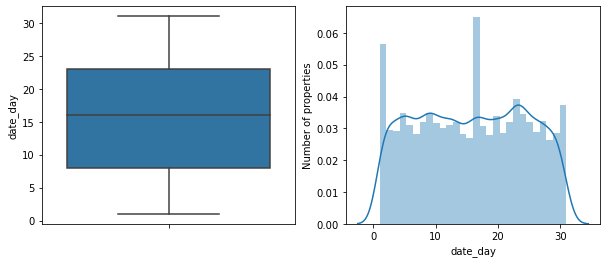

In [106]:
for var in numericals:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('Number of properties')
    fig.set_xlabel(var)

    plt.show()

##Bedrooms 

<AxesSubplot:xlabel='bedrooms'>

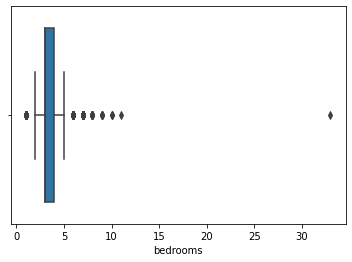

In [107]:
sns.boxplot(x=df2['bedrooms'])


In [108]:
from sklearn.preprocessing import StandardScaler


In [109]:
#removing outliers by defining upper and lower limits

<AxesSubplot:xlabel='bedrooms'>

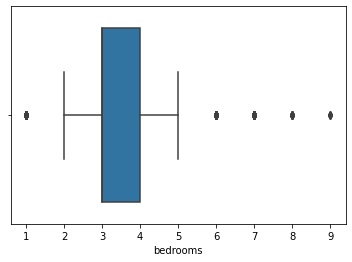

In [110]:
q3 = df2['bedrooms'].quantile(.75)
q1 = df2['bedrooms'].quantile(.25)

# calculating the interquartile range
iqr = q3 - q1

# calculating the median
median = df2['bedrooms'].median()

# defining the upper and lower limit of the data 
outlier_limit_upper = median + 7*iqr
outlier_limit_lower = median - 10.5*iqr

# return only those rows between upper and lower outliers
df2 = df2[(df2['bedrooms'] > outlier_limit_lower) & (df2['bedrooms'] < outlier_limit_upper)] 

sns.boxplot(x=df2['bedrooms'])


In [111]:
df2['bedrooms'].value_counts()


3    9824
4    6882
2    2760
5    1601
6     272
1     196
7      38
8      13
9       6
Name: bedrooms, dtype: int64

## same now with bathrooms

<AxesSubplot:xlabel='bathrooms'>

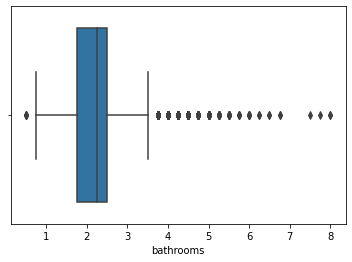

In [112]:
sns.boxplot(x=df2['bathrooms'])

In [113]:
q3 = df2['bathrooms'].quantile(.75)
q1 = df2['bathrooms'].quantile(.25)

# calculating the interquartile range
iqr = q3 - q1

# calculating the median
median = df2['bathrooms'].median()

# defining the upper and lower limit of the data (1.5*IQR)
outlier_limit_upper = median + 2.5*iqr
outlier_limit_lower = median - 1.5*iqr

# return only those rows between upper and lower outliers
df2 = df2[(df2['bathrooms'] > outlier_limit_lower) & (df2['bathrooms'] < outlier_limit_upper)] 

<AxesSubplot:xlabel='bathrooms'>

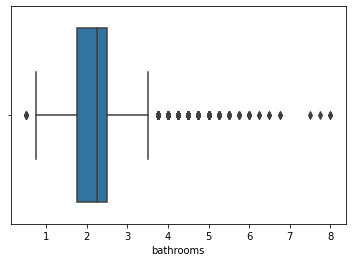

In [114]:
sns.boxplot(x=df['bathrooms'])

## same now with "sqft_lot"

<AxesSubplot:xlabel='sqft_lot'>

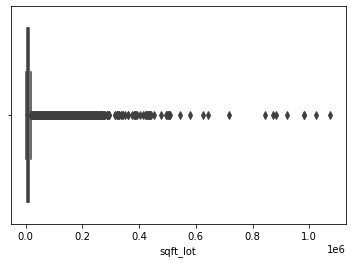

In [115]:
sns.boxplot(x=df2['sqft_lot'])

In [116]:
#outliers are not considered real ones because there is a lot of data in it we dont want to lose for model


NORMALIZING BEFORE MODELING AGAIN

In [117]:
df2.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_living15,sqft_lot15,price
1,0,0,0,0,0,0,0,0,0,0,...,3,2.25,2570,7242,2.0,7,2170,1690,7639,538000
3,0,0,0,0,0,0,0,0,0,0,...,4,3.00,1960,5000,1.0,7,1050,1360,5000,604000
4,0,0,0,0,0,0,0,0,0,0,...,3,2.00,1680,8080,1.0,8,1680,1800,7503,510000
6,0,1,0,0,0,0,0,0,0,0,...,3,2.25,1715,6819,2.0,7,1715,2238,6819,257500
7,0,0,0,0,0,0,0,0,0,0,...,3,1.50,1060,9711,1.0,7,1060,1650,9711,291850


In [118]:
num = df2._get_numeric_data()
X_num = num.drop(columns=['price'])

In [119]:
transformer = StandardScaler().fit(X_num)
X_stan = transformer.transform(X_num)
print(X_stan.shape)

(17401, 78)


In [120]:
X_stan

array([[-0.089735  , -0.11675103, -0.12648372, ...,  0.33310018,
        -0.60167395, -0.2009962 ],
       [-0.089735  , -0.11675103, -0.12648372, ..., -1.11001601,
        -1.09897634, -0.2969925 ],
       [-0.089735  , -0.11675103, -0.12648372, ..., -0.29826316,
        -0.43590648, -0.20594334],
       ...,
       [-0.089735  , -0.11675103, -0.12648372, ..., -0.49153764,
        -0.84279026, -0.42398116],
       [-0.089735  , -0.11675103, -0.12648372, ...,  0.5134897 ,
        -0.39069717, -0.21696527],
       [-0.089735  , -0.11675103, -0.12648372, ..., -0.40134288,
        -1.02362749, -0.43205663]])

In [121]:
X=  X_stan

# Modeling again

## linear regression

In [122]:
y=df2.price

In [123]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, random_state = 42) 

In [124]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
predictions = model.predict(X_test)

In [126]:
r2_LINEAR=  r2_score(y_test, predictions)
RMSE_LINEAR = mean_squared_error(y_test,predictions, squared=False)
MSE_LINEAR =  mean_squared_error(y_test, predictions)
MAE_LINEAR = mean_absolute_error(y_test,predictions)

In [127]:
print ("R2 is:",r2_LINEAR)
print ("RMSE is:",RMSE_LINEAR)
print ("MSE is:",MSE_LINEAR)
print ("MAE is:",MAE_LINEAR)

R2 is: 0.7616984941437319
RMSE is: 161439.2121798907
MSE is: 26062619229.263763
MAE is: 101891.45771638531


In [128]:
results = diff_df(y_test, predictions)
results

,true,pred,diff
7463,425000,3.972749e+05,27725.132117
10271,540500,7.069042e+05,-166404.236570
18537,720000,7.857181e+05,-65718.071881
129,430000,3.247020e+05,105298.021974
13196,488000,4.764749e+05,11525.094301
...,...,...,...
6664,1520000,1.317431e+06,202569.167983
15060,759000,6.315275e+05,127472.511255
19005,425000,3.538120e+05,71188.041860
15834,1520000,1.386014e+06,133986.374528


<AxesSubplot:xlabel='true', ylabel='pred'>

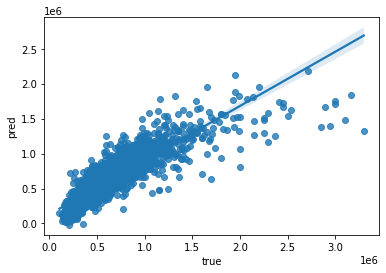

In [129]:
 sns.regplot(results['true'], results['pred'])


In [130]:
###mlp

In [131]:
model_mlp = MLPRegressor(random_state=42, max_iter=9000)


In [132]:
model_mlp.fit(X_train, y_train)


MLPRegressor(max_iter=9000, random_state=42)

In [133]:
predictions_mlp = model_mlp.predict(X_test)


In [134]:
r2_MLP=  r2_score(y_test, predictions_mlp)
RMSE_MLP = mean_squared_error(y_test,predictions_mlp, squared=False)
MSE_MLP =  mean_squared_error(y_test, predictions_mlp)
MAE_MLP = mean_absolute_error(y_test,predictions_mlp)

In [135]:
print ("R2 is:",r2_MLP)
print ("RMSE is:",RMSE_MLP)
print ("MSE is:",MSE_MLP)
print ("MAE is:",MAE_MLP)

R2 is: 0.8310548696958617
RMSE is: 135930.9885397453
MSE is: 18477233645.392372
MAE is: 79482.17655785054


In [136]:
MLP_results = diff_df(y_test, predictions_mlp)
MLP_results

,true,pred,diff
7463,425000,4.294688e+05,-4468.764116
10271,540500,7.396648e+05,-199164.781619
18537,720000,7.575095e+05,-37509.490351
129,430000,4.185388e+05,11461.176374
13196,488000,4.608987e+05,27101.309758
...,...,...,...
6664,1520000,1.325097e+06,194903.157421
15060,759000,6.684683e+05,90531.683597
19005,425000,4.088075e+05,16192.529525
15834,1520000,1.370682e+06,149317.923434


<AxesSubplot:xlabel='price'>

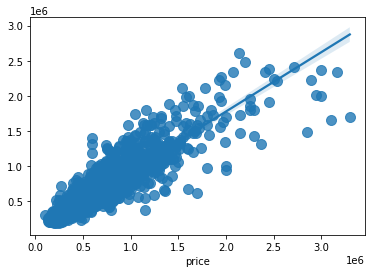

In [137]:
sns.regplot(y_test, predictions_mlp, fit_reg=True, scatter_kws={"s": 100})

In [138]:
##KNN

In [139]:
scores = []
for i in range(2,15): 
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))


Text(0, 0.5, 'R2')

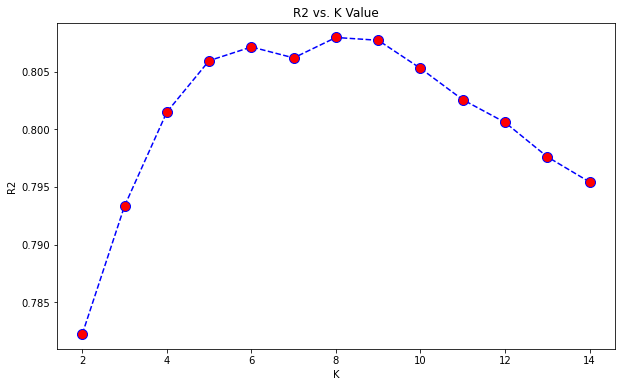

In [140]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, color = 'blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [141]:
model = KNeighborsRegressor(n_neighbors=8)

model.fit(X_train, y_train)

test_predictions = model.predict(X_test)

In [142]:
r2_KNR=  r2_score(y_test, test_predictions)
RMSE_KNR= mean_squared_error(y_test,test_predictions, squared=False)
MSE_KNR=  mean_squared_error(y_test, test_predictions)
MAE_KNR= mean_absolute_error(y_test,test_predictions)

In [143]:
print ("R2 is:",r2_KNR)
print ("RMSE is:",RMSE_KNR)
print ("MSE is:",MSE_KNR)
print ("MAE is:",MAE_KNR)

R2 is: 0.8079514457709452
RMSE is: 144927.61898098123
MSE is: 21004014743.496475
MAE is: 81582.29183424303


<AxesSubplot:xlabel='price'>

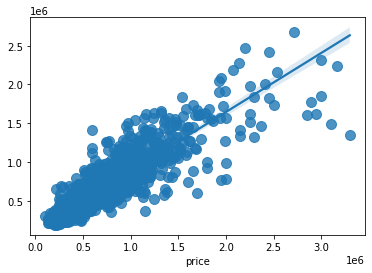

In [144]:
sns.regplot(y_test, test_predictions, fit_reg=True, scatter_kws={"s": 100})

In [145]:
r2_LINEAR

0.7616984941437319

In [146]:
r2_MLP

0.8310548696958617

In [147]:
r2_KNR

0.8079514457709452

In [148]:
round2 = [r2_LINEAR, r2_MLP,r2_KNR]

In [149]:
round2

[0.7616984941437319, 0.8310548696958617, 0.8079514457709452]

In [150]:
labels = ['LinearRegression','MLP','KNR']
models= labels
results = pd.DataFrame({'Models': models, 'Round1': round1, 
                      'Round2': round2})

No handles with labels found to put in legend.


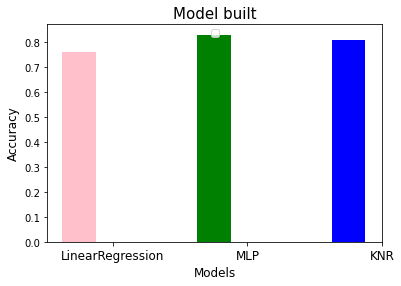

In [151]:
plt.figure()
wd = 0.5
x_pos = np.arange(1, 2*len(labels), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, results.Round2, color=['pink', 'green','blue'], width=wd,
        )

# Add xticks
plt.xticks(x_pos+wd, results.Models.values, fontsize=12)
plt.yticks(fontsize=10)
plt.title('Model built', fontsize=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.legend(loc='upper center', fontsize=10)
plt.show()


# NOW PUTTING TOGETHER ALL 2 ROUNDS WITH 3 MODELS


In [152]:
labels = ['LinearRegression','MLP','KNR']
models= labels
results = pd.DataFrame({'Models': models, 'Round1': round1, 
                      'Round2': round2})

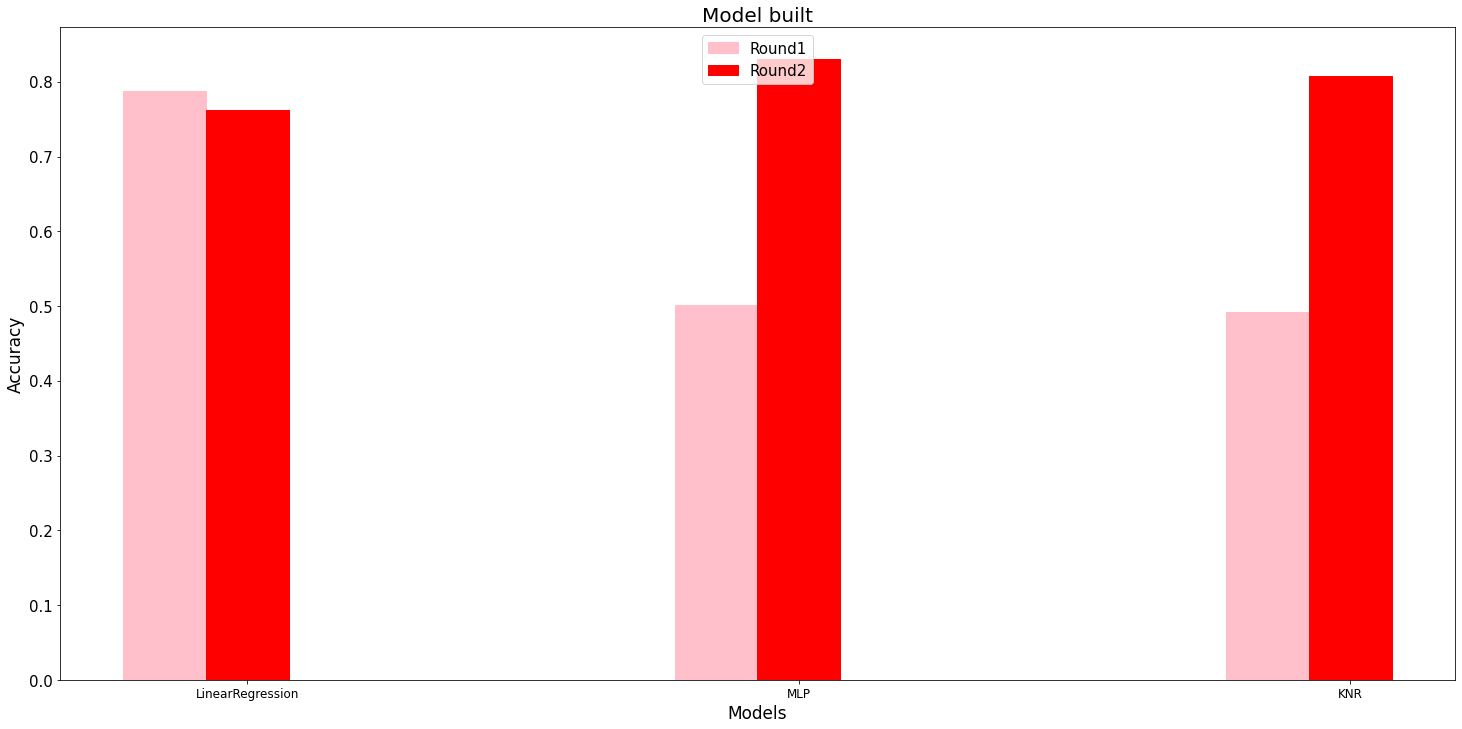

In [153]:


plt.figure(figsize=[25, 12])

wd = 0.3
x_pos = np.arange(1, 2*len(labels), 2)

plt.bar(x_pos, results.Round1, color='pink', width=wd, edgecolor='pink',
        label='Round1')
plt.bar(x_pos+wd, results.Round2, color='red', width=wd, edgecolor='red', 
        label='Round2')

plt.xticks(x_pos+wd, results.Models.values, fontsize=12)
plt.yticks(fontsize=15)
plt.title('Model built', fontsize=20)
plt.xlabel('Models', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)

plt.legend(loc='upper center', fontsize=15)
plt.show()


# CONCLUSIONS


Highest perfoming model is MLP for more "treated" data, as prices are grow in average the model finds it harder to predict, this might be due to the fact that we have less data on higher priced properties, model is recommended to predict mid range level houses

in order to go further into price predicition, the team would need additional data points to reach a greater prediction accuracy. 


# scores for MLP
R2 is: 0.8310548696958617
RMSE is: 135930.9885397453
MSE is: 18477233645.392372
MAE is: 79482.17655785054